# Analyzing Police Activity with pandas

--- 

## Contents

### [Chapter 1. Prepare the data for analysis](#section_ID_1)

### [Chapter 2. Exploring the relationship between gender and policing](#section_ID_2)

### [Chapter 3. Visual exploratory data analysis](#section_ID_3)

### [Chapter 4. Analyzing the effect of weather on policing](#section_ID_4)

--- 

<a id="section_ID_1"></a>


## 1. Prepare the data for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ri=pd.read_csv('trafficstops_rhodeisland.csv')

<div class="alert alert-block alert-warning">
<b>1.1 Examining the dataset

</div>

Throughout this course, you'll be analyzing a dataset of traffic stops in Rhode Island that was collected by the Stanford Open Policing Project.

Before beginning your analysis, it's important that you familiarize yourself with the dataset. In this exercise, you'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

- Examine the first 5 rows of the DataFrame (known as the "head").
- Count the number of missing values in each column: Use .isnull() to check which DataFrame elements are missing, and then take the .sum() to count the number of True values in each column.


In [8]:
# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

<div class="alert alert-block alert-warning">
<b>1.2 Dropping Columns

</div>

Often, a DataFrame will contain columns that are not useful to your analysis. Such columns should be dropped from the DataFrame, to make it easier for you to focus on the remaining columns.

In this exercise, you'll drop the county_name column because it only contains missing values, and you'll drop the state column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information. The number of missing values in each column has been printed to the console for you.

- Examine the DataFrame's .shape to find out the number of rows and columns.
- Drop both the county_name and state columns by passing the column names to the .drop() method as a list of strings.
- Examine the .shape again to verify that there are now two fewer columns.


In [9]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(91741, 15)
(91741, 13)


<div class="alert alert-block alert-warning">
<b>1.3 Dropping Rows

</div>

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this course, the driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

- Count the number of missing values in each column.
- Drop all rows that are missing driver_gender by passing the column name to the subset parameter of .dropna().
- Count the number of missing values in each column again, to verify that none of the remaining rows are missing driver_gender.
- Examine the DataFrame's .shape to see how many rows and columns remain.




In [11]:
# Count the number of missing values in each column
print(ri.isnull().sum())
print('-----------------------')

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())
print('-----------------------')

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
-----------------------
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
-----------------------
(86536, 13)


<div class="alert alert-block alert-warning">
<b>1.4 Fixing a data type


</div>

We saw in the previous exercise that the is_arrested column currently has the object data type. In this exercise, we'll change the data type to bool, which is the most suitable type for a column containing True and False values.

Fixing the data type will enable us to use mathematical operations on the is_arrested column that would not be possible otherwise.

- Examine the head of the is_arrested column to verify that it contains True and False values and to check the column's data type.
- Use the .astype() method to convert is_arrested to a bool column.
- Check the new data type of is_arrested to confirm that it is now a bool column.


In [12]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype("bool")

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


<div class="alert alert-block alert-warning">
<b>1.5 Combining object columns



</div>

Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.

In this exercise, you'll combine these two columns into a single column, and then convert it to datetime format. This will enable convenient date-based attributes that we'll use later in the course.

- Use a string method to concatenate stop_date and stop_time (separated by a space), and store the result in combined.
- Convert combined to datetime format, and store the result in a new column named stop_datetime.
- Examine the DataFrame .dtypes to confirm that stop_datetime is a datetime column.


In [13]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


<div class="alert alert-block alert-warning">
<b>1.6 Setting the index



</div>

The last step that you'll take in this chapter is to set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, you'll make it easier to analyze the dataset by date and time, which will come in handy later in the course!

- Set stop_datetime as the DataFrame index.
- Examine the index to verify that it is a DatetimeIndex.
- Examine the DataFrame columns to confirm that stop_datetime is no longer one of the columns.

In [14]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)



DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


<a id="section_ID_2"></a>

## 2. Exploring the relationship between gender and policing

<div class="alert alert-block alert-warning">
<b>2.1 Examining traffic violations
</b> 

</div>

Before comparing the violations being committed by each gender, you should examine the violations committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the violation column, and then separately express those counts as proportions.

- Count the unique values in the violation column of the ri DataFrame, to see what violations are being committed by all drivers.
- Express the violation counts as proportions of the total.


In [16]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

print('-----------------------------')

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
-----------------------------
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


<div class="alert alert-block alert-warning">
<b>2.2 Comparing violations by gender

</b> 

</div>

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In this exercise, you'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

- Create a DataFrame, female, that only contains rows in which driver_gender is 'F'.
- Create a DataFrame, male, that only contains rows in which driver_gender is 'M'.
- Count the violations committed by female drivers and express them as proportions.
- Count the violations committed by male drivers and express them as proportions.

In [17]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == "F"]

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == "M"]

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


<div class="alert alert-block alert-warning">
<b>2.3 Comparing speeding outcomes by gender


</b> 

</div>

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, you'll use the stop_outcome column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

- Create a DataFrame, female_and_speeding, that only includes female drivers who were stopped for speeding.
- Create a DataFrame, male_and_speeding, that only includes male drivers who were stopped for speeding.
- Count the stop outcomes for the female drivers and express them as proportions.
- Count the stop outcomes for the male drivers and express them as proportions.


In [18]:
# Create a DataFrame of female drivers stopped for speeding
is_female=(ri.driver_gender=="F")
is_speeding = (ri.violation == "Speeding")

female_and_speeding = ri[is_female & is_speeding]

# Create a DataFrame of male drivers stopped for speeding

is_male=(ri.driver_gender=="M")
male_and_speeding = ri[is_male & is_speeding]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


<div class="alert alert-block alert-warning">
<b>2.4 Calculating the search rate



</b> 

</div>

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops in the ri DataFrame that result in a vehicle search, also known as the search rate.

- Check the data type of search_conducted to confirm that it's a Boolean Series.
- Calculate the search rate by counting the Series values and expressing them as proportions.
- Calculate the search rate by taking the mean of the Series. (It should match the proportion of True values calculated above.)


In [19]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtypes)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


<div class="alert alert-block alert-warning">
<b>2.5 Comparing search rates by gender




</b> 

</div>

In this exercise, you'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 3.8%.

First, you'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a .groupby().

- Filter the DataFrame to only include female drivers, and then calculate the search rate by taking the mean of search_conducted.




In [20]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender=="F"].search_conducted.mean())

0.019180617481282074


- Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.



In [21]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender=="M"].search_conducted.mean())

0.04542557598546892


- Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.


In [22]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby("driver_gender").search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


<div class="alert alert-block alert-warning">
<b>2.6 Adding a second factor to the analysis





</b> 

</div>

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

- Use a .groupby() to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?


In [27]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


- Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.


In [28]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())


violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


<div class="alert alert-block alert-warning">
<b>2.7 Counting protective frisks






</b> 

</div>

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

In this exercise, you'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

- Count the search_type values in the ri DataFrame to see how many times "Protective Frisk" was the only search type.
- Create a new column, frisk, that is True if search_type contains the string "Protective Frisk" and False otherwise.
- Check the data type of frisk to confirm that it's a Boolean Series.
- Take the sum of frisk to count the total number of frisks.

In [29]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

<div class="alert alert-block alert-warning">
<b>2.8 Comparing frisk rates by gender






</b> 

</div>

In this exercise, you'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the DataFrame to only include the relevant subset of data, namely stops in which a search was conducted.

- Create a DataFrame, searched, that only contains rows in which search_conducted is True.
- Take the mean of the frisk column to find out what percentage of searches included a frisk.
- Calculate the frisk rate for each gender using a .groupby().




In [30]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())


0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


<a id="section_ID_3"></a>

## 3. Visual exploratory data analysis

<div class="alert alert-block alert-warning">
<b>3.1 Calculating the hourly arrest rate

</b> 

</div>

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ri DataFrame. Then, you'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

0 = midnight  
12 = noon  
23 = 11 PM  


- Take the mean of the is_arrested column to calculate the overall arrest rate.
- Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.
- Save the hourly arrest rate Series as a new object, hourly_arrest_rate.


In [33]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())
print('--------------------')

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())


# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
--------------------
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


<div class="alert alert-block alert-warning">
<b>3.2 Plotting the hourly arrest rate

</b> 

</div>

In this exercise, you'll create a line plot from the hourly_arrest_rate object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

- Create a line plot of hourly_arrest_rate using the .plot() method.
- Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.
- Display the plot using the .show() function.


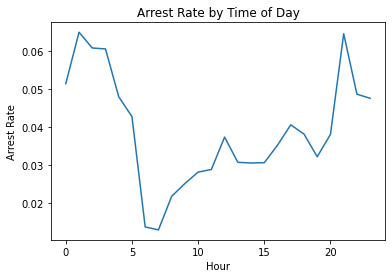

In [34]:

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()


#### Make the same plot with plotly

In [54]:
df_hourly_arrest_rate = pd.DataFrame(hourly_arrest_rate)

In [55]:
df_hourly_arrest_rate.reset_index(inplace=True)

In [56]:
df_hourly_arrest_rate.head()

,stop_datetime,is_arrested
0,0,0.051431
1,1,0.064932
2,2,0.060798
3,3,0.060549
4,4,0.048000


In [170]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

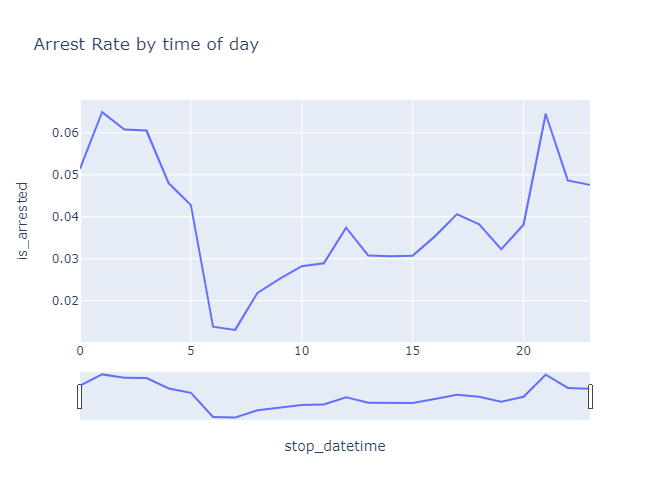

In [180]:
# Create the basic line chart in plotly

fig = px.line(data_frame=df_hourly_arrest_rate,
              x='stop_datetime',
              y='is_arrested',
              title="Arrest Rate by time of day",
              height=500)

# make slider under visible
fig.update_xaxes(
    rangeslider_visible=True)

    
fig.show(renderer="jupyterlab")


<div class="alert alert-block alert-warning">
<b>3.3 Plotting drug-related stops


</b> 

</div>

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column drugs_related_stop indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over time.

- Calculate the annual rate of drug-related stops by resampling the drugs_related_stop column (on the 'A' frequency) and taking the mean.
- Save the annual drug rate Series as a new object, annual_drug_rate.
- Create a line plot of annual_drug_rate using the .plot() method.
- Display the plot using the .show() function.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


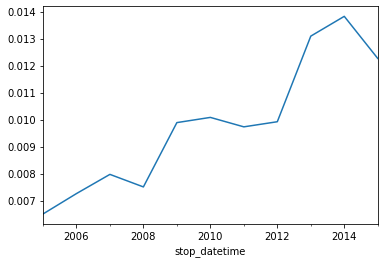

In [58]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

#### Make the same plot with plotly

In [61]:
df_annual_drug_rate = pd.DataFrame(annual_drug_rate)

In [63]:
df_annual_drug_rate.reset_index(inplace=True)

In [64]:
df_annual_drug_rate.head()

,stop_datetime,drugs_related_stop
0,2005-12-31,0.006501
1,2006-12-31,0.007258
2,2007-12-31,0.007970
3,2008-12-31,0.007505
4,2009-12-31,0.009889


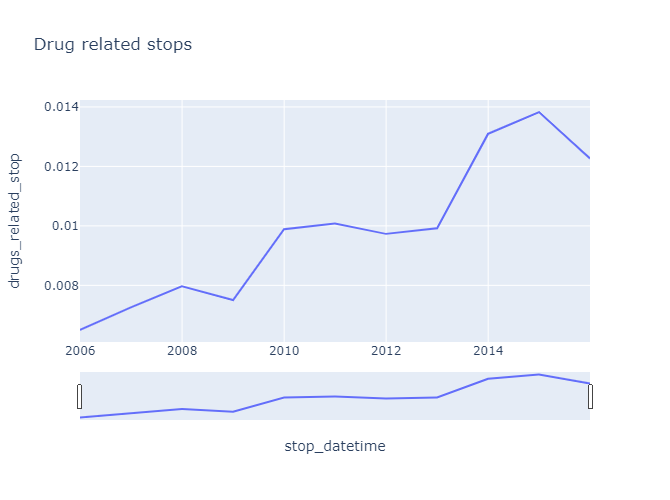

In [181]:
# Create the basic line chart in plotly

fig = px.line(data_frame=df_annual_drug_rate,
              x='stop_datetime',
              y='drugs_related_stop',
              title="Drug related stops",
              height=500)

# make slider under visible
fig.update_xaxes(
    rangeslider_visible=True)

    
fig.show(renderer="jupyterlab")

<div class="alert alert-block alert-warning">
<b>3.4 Comparing drug and search rates


</b> 

</div>

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

- Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate.
- Concatenate annual_drug_rate and annual_search_rate along the columns axis, and save the result as annual.
- Create subplots of the drug and search rates from the annual DataFrame.
- Display the subplots.

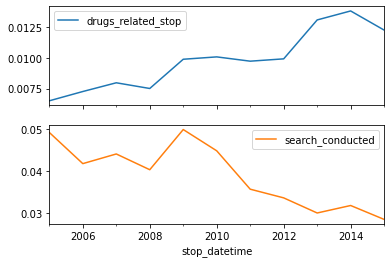

In [66]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

#### Make the same plot with plotly

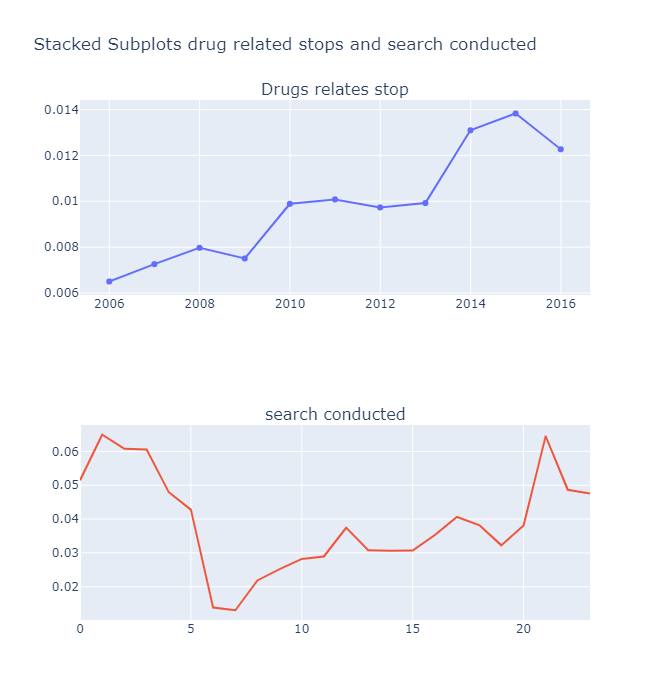

In [182]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig_sub = make_subplots(rows=2, cols=1,
                        subplot_titles=('Drugs relates stop',  'search conducted'))



fig_sub.append_trace(go.Scatter(
    x=df_annual_drug_rate.stop_datetime,
    y=df_annual_drug_rate.drugs_related_stop,
), row=1, col=1)


fig_sub.append_trace(go.Scatter(
    x=df_hourly_arrest_rate.stop_datetime,
    y=df_hourly_arrest_rate.is_arrested,
), row=2, col=1)



fig_sub.update_layout(height=700, title_text="Stacked Subplots drug related stops and search conducted", showlegend=False)
fig_sub.show(renderer="jupyterlab")

<div class="alert alert-block alert-warning">
<b>3.5 Tallying violations by district



</b> 

</div>

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the "K" zones, which you'll examine further in the next exercise.

- Create a frequency table from the ri DataFrame's district and violation columns using the pd.crosstab( ) function.
- Save the frequency table as a new object, all_zones.
- Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[ ] accessor.
- Save the smaller table as a new object, k_zones.


In [95]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))
print('-------------------')

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
-------------------
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                  

<div class="alert alert-block alert-warning">
<b>3.6 Plotting violations by district



</b> 

</div>

Now that you've created a frequency table focused on the "K" zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a bar plot, which is an appropriate plot type since you're comparing categorical data. Then you'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do you find to be more insightful?

- Create a bar plot of k_zones.
- Display the plot and examine it. What do you notice about each of the zones?


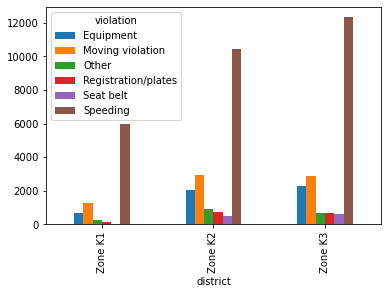

In [96]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

In [97]:
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


- Create a stacked bar plot of k_zones.
- Display the plot and examine it. Do you notice anything different about the data than you did previously?

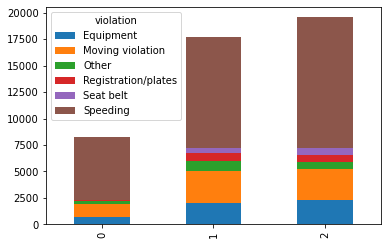

In [119]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

#### Make the same plot with seaborn

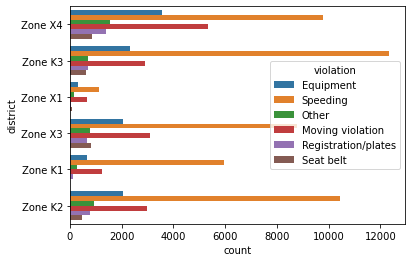

In [126]:
k_plot = sns.countplot(y="district", hue="violation", data=ri)


<div class="alert alert-block alert-warning">
<b>3.7 Converting stop durations to numbers


</b> 

</div>

In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as '0-15 Min'. How can you make this data easier to analyze?

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

- Convert '0-15 Min' to 8
- Convert '16-30 Min' to 23
- Convert '30+ Min' to 45


- Print the unique values in the stop_duration column. (This has been done for you.)
- Create a dictionary called mapping that maps the stop_duration strings to the integers specified above.
- Convert the stop_duration strings to integers using the mapping, and store the results in a new column called stop_minutes.
- Print the unique values in the stop_minutes column, to verify that the durations were properly converted to integers.



In [128]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45 }

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


<div class="alert alert-block alert-warning">
<b>3.8 Plotting stop length


</b> 

</div>

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the average length of time drivers are stopped for each type of violation. Rather than using the violation column in this exercise, you'll use violation_raw since it contains more detailed descriptions of the violations.

- For each value in the ri DataFrame's violation_raw column, calculate the mean number of stop_minutes that a driver is detained.
- Save the resulting Series as a new object, stop_length.
- Sort stop_length by its values, and then visualize it using a horizontal bar plot.


violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


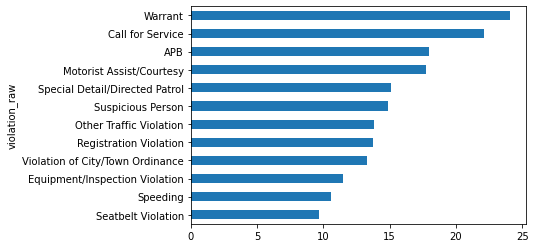

In [129]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()


In [133]:
df_stop_length = pd.DataFrame(stop_length)


In [134]:
df_stop_length.reset_index(inplace=True)

In [135]:
df_stop_length.head()

,violation_raw,stop_minutes
0,APB,17.967033
1,Call for Service,22.124371
2,Equipment/Inspection Violation,11.445655
3,Motorist Assist/Courtesy,17.741463
4,Other Traffic Violation,13.844490


#### Make the same plot with plotly

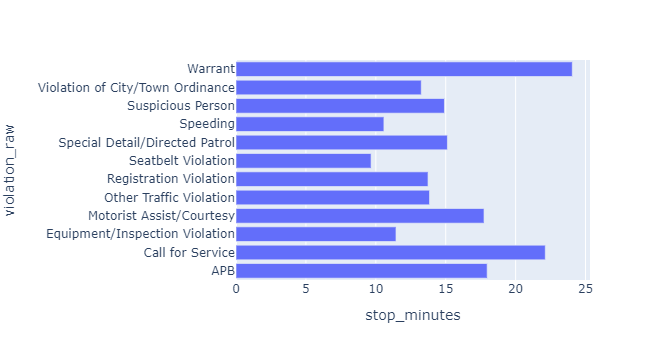

In [183]:
fig_bar = px.bar(df_stop_length, x='stop_minutes', y='violation_raw')
fig_bar.show(renderer="jupyterlab")

<a id="section_ID_4"></a>

## 4. Analyzing the effect of weather on policing

<div class="alert alert-block alert-warning">
<b>4.1  Plotting the temperature


</b> 

</div>

In this exercise, you'll examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First you'll print the summary statistics, and then you'll visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

- Read weather.csv into a DataFrame named weather.
- Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics using the .describe() method.
- Create a box plot to visualize the temperature columns.
- Display the plot.



              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


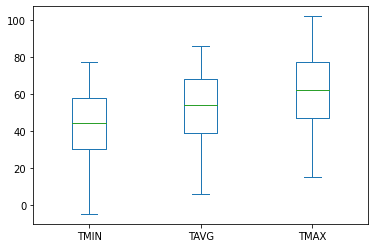

In [137]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather_rhodeisland.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

#### Make the same plot with plotly

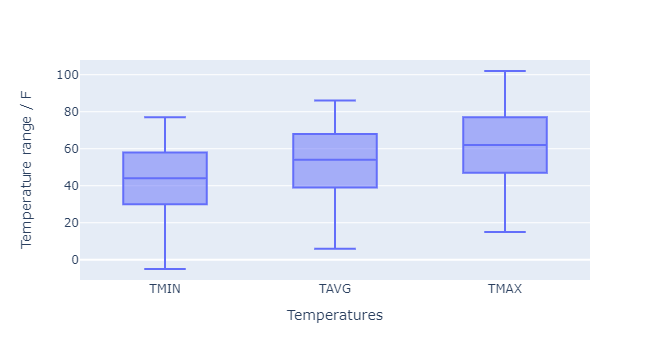

In [184]:
fig_box = px.box(
    data_frame=weather,
    y=['TMIN', 'TAVG', 'TMAX'],
)

fig_box.update_layout(
    xaxis_title="Temperatures",
    yaxis_title="Temperature range / F")


fig_box.show(renderer="jupyterlab")


<div class="alert alert-block alert-warning">
<b>4.2  Plotting the temperature difference



</b> 

</div>

n this exercise, you'll continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

What do you notice about the resulting histogram? Does it match your expectations, or do you see anything unusual?

- Create a new column in the weather DataFrame named TDIFF that represents the difference between the maximum and minimum temperatures.
- Print the summary statistics for TDIFF using the .describe() method.
- Create a histogram with 20 bins to visualize TDIFF.
- Display the plot.


count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


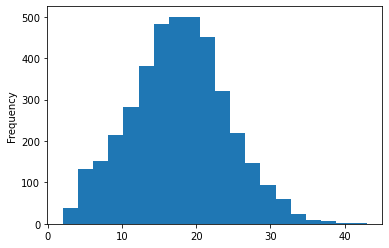

In [144]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

#### Make the same plot with plotly

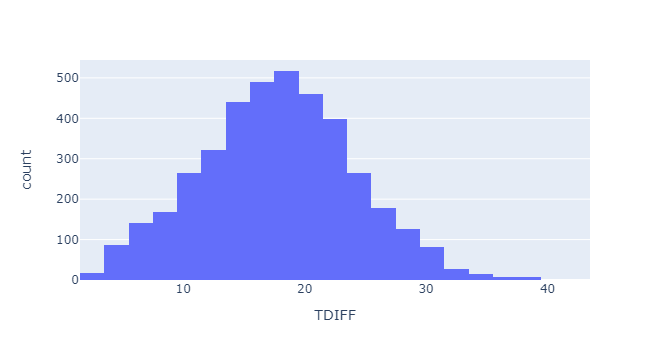

In [185]:
fig_hist = px.histogram(
    data_frame=weather, 
    x='TDIFF',
    nbins=21)

fig_hist.show(renderer="jupyterlab")

<div class="alert alert-block alert-warning">
<b>4.3   Counting bad weather conditions


</b> 

</div>

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

WT05 indicates "Hail"
WT11 indicates "High or damaging winds"
WT17 indicates "Freezing rain"
For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

In this exercise, you'll quantify "how bad" the weather was each day by counting the number of 1 values in each row.

- Copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
- Calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.
- Replace any missing values in bad_conditions with a 0. 
- Create a histogram to visualize bad_conditions, and then display the plot.


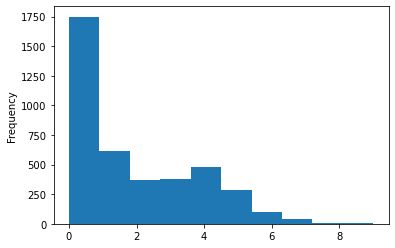

In [148]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22' ]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()


#### Make the same plot with plotly

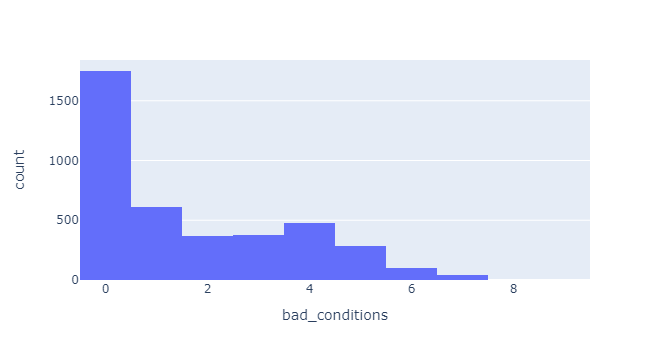

In [186]:
fig_hist_2 = px.histogram(
    data_frame=weather, 
    x='bad_conditions')

fig_hist_2.show(renderer="jupyterlab")

<div class="alert alert-block alert-warning">
<b>4.4 Rating the weather conditions


</b> 

</div>

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- Convert 0 to 'good'
- Convert 1 through 4 to 'bad'
- Convert 5 through 9 to 'worse'

- Count the unique values in the bad_conditions column and sort the index. 
- Create a dictionary called mapping that maps the bad_conditions integers to strings as specified above.
- Convert the bad_conditions integers to strings using the mapping and store the results in a new column called rating.
- Count the unique values in rating to verify that the integers were properly converted to strings.

In [152]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3: 'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


<div class="alert alert-block alert-warning">
<b>4.5   Changing the data type to category


</b> 

</div>

Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

- Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.
- Change the data type of the rating column from object to category. Make sure to use the cats list to define the category ordering.
- Examine the head of the rating column to confirm that the categories are logically ordered.

In [157]:
from pandas.api.types import CategoricalDtype


In [158]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category

cat_type = CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather.rating.astype(cat_type)



# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


<div class="alert alert-block alert-warning">
<b>4.6  Preparing the DataFrames


</b> 

</div>

In this exercise, you'll prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

1. With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.
2. With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.

- Reset the index of the ri DataFrame.
- Examine the head of ri to verify that stop_datetime is now a DataFrame column, and the index is now the default integer index.
- Create a new DataFrame named weather_rating that contains only the DATE and rating columns from the weather DataFrame.
- Examine the head of weather_rating to verify that it contains the proper columns.

In [160]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())
print('----------------')

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]


# Examine the head of 'weather_rating'
print(weather_rating.head())


   index       stop_datetime   stop_date stop_time driver_gender driver_race  \
0      0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1      1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2      2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3      3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4      4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs

<div class="alert alert-block alert-warning">
<b>4.7   Merging the DataFrames


</b> 

</div>

In this exercise, you'll merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from ri and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set stop_datetime as the index, which is the column you saved in the previous exercise.

- Examine the shape of the ri DataFrame.
- Merge the ri and weather_rating DataFrames using a left join.
- Examine the shape of ri_weather to confirm that it has two more columns but the same number of rows as ri.
- Replace the index of ri_weather with the stop_datetime column.

In [161]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 17)
(86536, 19)


<div class="alert alert-block alert-warning">
<b>4.8   Comparing arrest rates by weather rating


</b> 

</div>

Do police officers arrest drivers more often when the weather is bad? Find out below!

- First, you'll calculate the overall arrest rate.
- Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
- Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

- Calculate the overall arrest rate by taking the mean of the is_arrested Series.

In [162]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.0355690117407784


- Calculate the arrest rate for each weather rating using a .groupby().

In [163]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


- Calculate the arrest rate for each combination of violation and rating. How do the arrest rates differ by group?

In [164]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


<div class="alert alert-block alert-warning">
<b>4.9 Selecting from a multi-indexed Series


</b> 

</div>

The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

The outer index level is like the DataFrame rows.
The inner index level is like the DataFrame columns.
In this exercise, you'll practice accessing data from a multi-indexed Series using the .loc[ ] accessor.


- Save the output of the .groupby() operation from the last exercise as a new object, arrest_rate. 
- Print the arrest_rate Series and examine it.
- Print the arrest rate for moving violations in bad weather.
- Print the arrest rates for speeding violations in all three weather conditions.

In [165]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


<div class="alert alert-block alert-warning">
<b>4.10   Reshaping the arrest rate data


</b> 

</div>

In this exercise, you'll start by reshaping the arrest_rate Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods.

Then, you'll create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

- Unstack the arrest_rate Series to reshape it into a DataFrame.
- Create the exact same DataFrame using a pivot table! Each of the three .pivot_table() parameters should be specified as one of the ri_weather columns.


In [166]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


In [167]:
# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886


---- 

<div class="alert alert-block alert-warning">
<b>END


</b> 

</div>